In [1]:
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
import json
import seaborn as sns

%matplotlib inline

3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]
1.19.2
1.1.3


In [2]:
# Load PIRUS Data
pirus = pd.read_csv('../data/clean_data/pirus_deep_clean_Final.csv')

# Load PIRUS Codebook
with open('../data/clean_data/pirus_codebook.json') as f:
    pirus_codebook = json.load(f)

# Load Custom Color Map
cmap = ['#E7E3DF', '#3186A9', '#EEAD9A', '#DBB03B', '#66759A', '#EBD79F', '#83684C', '#6D6E72', '#965341', '#8F917F', '#010503']
sns.set_palette(sns.color_palette(cmap))
sns.color_palette(cmap)

[(0.9058823529411765, 0.8901960784313725, 0.8745098039215686),
 (0.19215686274509805, 0.5254901960784314, 0.6627450980392157),
 (0.9333333333333333, 0.6784313725490196, 0.6039215686274509),
 (0.8588235294117647, 0.6901960784313725, 0.23137254901960785),
 (0.4, 0.4588235294117647, 0.6039215686274509),
 (0.9215686274509803, 0.8431372549019608, 0.6235294117647059),
 (0.5137254901960784, 0.40784313725490196, 0.2980392156862745),
 (0.42745098039215684, 0.43137254901960786, 0.4470588235294118),
 (0.5882352941176471, 0.3254901960784314, 0.2549019607843137),
 (0.5607843137254902, 0.5686274509803921, 0.4980392156862745),
 (0.00392156862745098, 0.0196078431372549, 0.011764705882352941)]

In [3]:
# Top Five Radical Ideologies by Gender

# Build ideology function to map code names to codes
ideology_codes = {'19': 'Male Supremacist','18': 'Other', '17': 'Anti-gay',
               '16': 'Jewish Defense League','15': 'Anti-Abortion', '14': 'Cult',
               '13': 'Irish Republican Army','12': 'Puerto Rican Nationalist',
               '11': 'Islamist', '10': 'Anarchist','9': 'Communist',
               '8': 'Black Nationalist','7': 'New Left', '6': 'Animal Rights/\nEnvironmentalist',
               '5': 'Christians','4': 'Anti-Government','3': 'Anti-Immigrant',
               '2': 'White Supremacist','1': 'Militia/Gun Rights'}
idsub_fun = lambda x: ideology_codes[str(x)]

# Build gender function to map code names to codes
g_codes = pirus_codebook['gender']['codes']
g_fun = lambda x: g_codes[str(x)]

# Load relevant pirus columns into new DataFrame (gendered_ideology)
gendered_ideology = pirus[['gender','ideological_sub_category1']]

# Append a column of 1s 
gendered_ideology['val'] = pd.Series([1 for i in range(len(gendered_ideology.index))])

# Map gender code names to gender codes
gendered_ideology['gender'] = gendered_ideology['gender'].apply(g_fun)

# Map ideology code names to ideology codes
gendered_ideology['ideological_sub_category1'] = gendered_ideology['ideological_sub_category1'].apply(idsub_fun)

# Group by gender and ideology
gendered_ideology = gendered_ideology.groupby(['gender','ideological_sub_category1'])

# For each group, sum the val column & convert group obj to DataFrame
gendered_ideology = gendered_ideology['val'].sum().to_frame(name = '# of instances').reset_index()

# Get the top 5 ideologies for Females
fem = gendered_ideology.loc[(gendered_ideology['gender']  == 'Female')]
fem = fem.sort_values('# of instances', ascending = False)[:5]

# Get the top 5 ideologies for Males
men = gendered_ideology.loc[(gendered_ideology['gender']  == 'Male')]
men = men.sort_values('# of instances', ascending = False)[:5]

# Append top 5 ideologies into a single DataFrame
gendered_ideology = pd.DataFrame.append(men,fem)

<ipython-input-3-9f68bf7ba30e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gendered_ideology['val'] = pd.Series([1 for i in range(len(gendered_ideology.index))])
<ipython-input-3-9f68bf7ba30e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gendered_ideology['gender'] = gendered_ideology['gender'].apply(g_fun)
<ipython-input-3-9f68bf7ba30e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

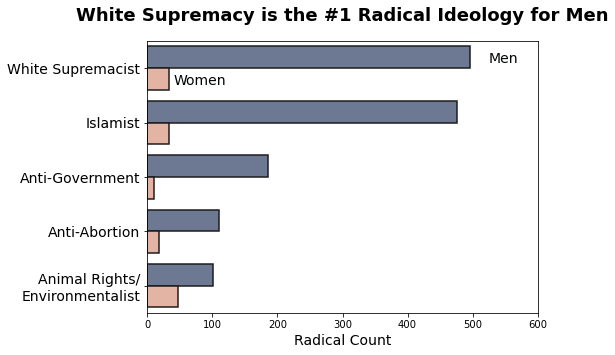

In [4]:
# Plot Figure
fig, ax = plt.subplots(figsize=(7,5))

plot = sns.barplot(x = '# of instances', y = 'ideological_sub_category1', 
            hue = 'gender', data = gendered_ideology, 
            palette=['#66759A','#EEAD9A'], dodge=True, 
            linewidth=1.5, errcolor=".2", edgecolor=".1")

# Set title
ax.set_title('White Supremacy is the #1 Radical Ideology for Men', weight='bold',
             loc = 'center', pad = 20).set_fontsize('18')

# Adjust y axis
ax.set_ylabel("")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

# Adjust x axis
ax.set(xlim = (0,600))
ax.set_xlabel("Radical Count", fontsize = 14)

# Remove Legend
ax.get_legend().remove()

# Add annotations
annote1 = 'Men'
plt.text(525, -.1, annote1, horizontalalignment='left', size=14, color='#010503', weight='normal')

annote2 = 'Women'
plt.text(40, .3, annote2, horizontalalignment='left', size=14, color='#010503', weight='normal')

plt.show()